In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
landmarks = {
    "Jeonju": {
        "Daejeon": 62,
        "Gwangju": 80,
        "Jinju": 116
    },
    "Jinju": {
        "Jeonju": 116,
        "Busan": 86
    },
    "Gwangju": {"Jeonju":80, "Daejeon": 142},
    "Busan": {
        "Jinju": 86,
        "Ulsan": 46,
        "Jeju": 299
    },
    "Ulsan": {"Daejeon": 197, "Busan": 46},
    "Jeju": {"Busan": 299},
    "Daejeon": {
        "Jeonju":62,
        "Ulsan": 197,
        "Gwangju":142
    }
}

In [2]:
# BFS (shortest path)
def bfs(graph, start, end):
  visited = set()
  queue = [(start, [start])]
  while queue:
    current, path = queue.pop(0)
    if current == end:
      return path
    if current not in visited:
      visited.add(current)
      for neighbor in graph[current]:
        queue.append((neighbor, path + [neighbor]))
  return None


In [3]:
# Dijkstra`s (Shortest travel time)
def dijkstra(graph, start):
  min_heap = [(0, start)]
  times = {landmarks: float('inf') for landmarks in graph}
  times[start]  = 0
  while min_heap:
    current_time, current_landmark = heapq.heappop(min_heap)
    for neighbor, time in graph[current_landmark].items():
      new_time = current_time + time
      if new_time < times[neighbor]:
        times[neighbor] = new_time
        heapq.heappush(min_heap, (new_time, neighbor))
  return times

In [4]:
# Examples
print("BFS from Jeonju to Jeju:")
print(bfs(landmarks,"Jeonju", "Jeju"))

print("\nDijkstra`s from Jeonju:")
print(dijkstra(landmarks, "Jeonju"))

BFS from Jeonju to Jeju:
['Jeonju', 'Jinju', 'Busan', 'Jeju']

Dijkstra`s from Jeonju:
{'Jeonju': 0, 'Jinju': 116, 'Gwangju': 80, 'Busan': 202, 'Ulsan': 248, 'Jeju': 501, 'Daejeon': 62}


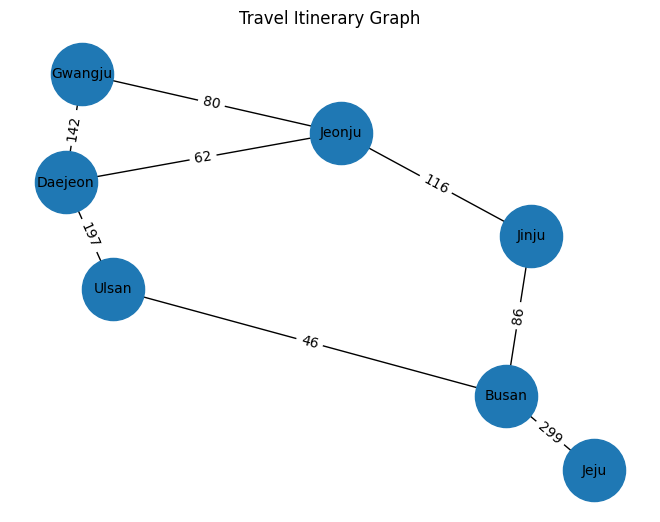

In [5]:
# Visualize The Graph
def visualize_graph(graph):
    G = nx.Graph()
    for landmark, connections in graph.items():
        for neighbor, weight in connections.items():
            G.add_edge(landmark, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Travel Itinerary Graph")
    plt.show()

# Visualization in action
visualize_graph(landmarks)